In [38]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

alpha = []
energy_dif = []

folder = 'results_COBYLA'
files = os.listdir(folder)
files_aer = [file for file in files if file.startswith('shots')]
files_exact = [file for file in files if file.startswith('N')]

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

files_aer = sorted(files_aer, key=ordenar_por_numero)


for index, archivo_csv in enumerate(files_aer):

    alpha.append([])
    energy_dif.append([])

    with open(os.path.join(folder, archivo_csv), 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            alpha[index].append(float(row[0]))
            energy_dif[index].append(float(row[1]))


with open(os.path.join(folder, files_exact[0]), 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for index, row in enumerate(reader):
        for i in range(len(energy_dif)):
            energy_dif[i][index] = float(row[1]) - energy_dif[i][index]

files_names = [file.split('.')[0] for file in files_aer]

In [39]:
files_names

['shots=16', 'shots=128', 'shots=1024', 'shots=16384']

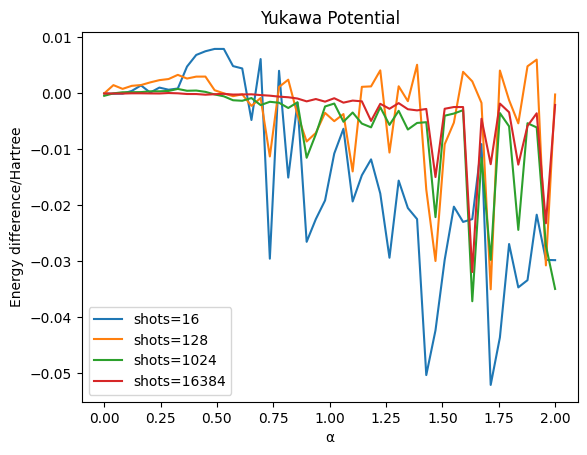

In [40]:
for index, file in enumerate(files_names):
    plt.plot(alpha[index], energy_dif[index], marker='', linestyle='-', label=file)
    plt.xlabel('α')
    plt.ylabel('Energy difference/Hartree')
    plt.title('Yukawa Potential')
    plt.legend()

plt.show()

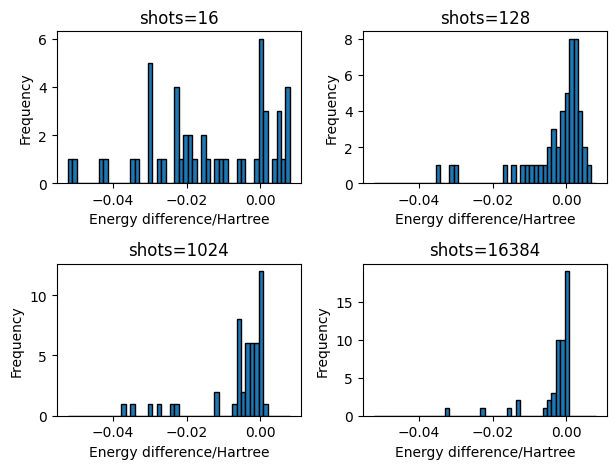

In [45]:
fig, axs = plt.subplots(2, 2)

min_value = min(min(subdata) for subdata in energy_dif)
max_value = max(max(subdata) for subdata in energy_dif)
num_bins = 50
bins = np.linspace(min_value, max_value, num_bins + 1)

for index, ax in enumerate(axs.flat):
    ax.hist(energy_dif[index], bins=bins, edgecolor='black')
    ax.set_title(files_names[index])
    ax.set_xlabel('Energy difference/Hartree')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()